In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


수치형 데이터(age, fare 등), 범주형 데이터(sex, embarked, class 등)

#

---

### 수치형 데이터 시각화

- histplot(): 히스토그램
- kdeplot() : 커널밀도추정 함수 그래프
- displot() : 분포도
- rugplot() : 러그플롯

#

#### 히스토그램(histplot)

히스토그램은 수치형 데이터의 구간별 빈도수를 나타내는 그래프

``` python
sns.histoplot(data=DataFrame 형식, x=분포를 파악하려는 feature)
```

<Axes: xlabel='age', ylabel='Count'>

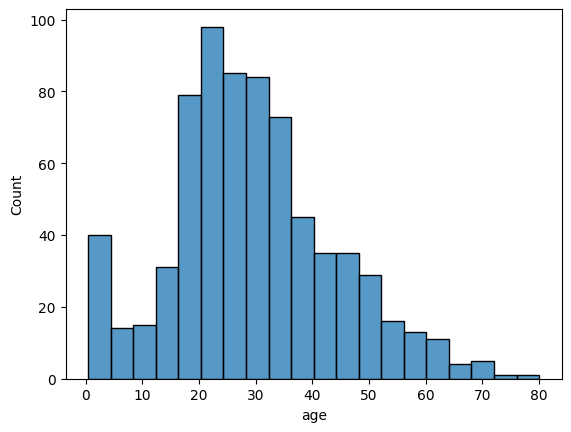

In [3]:
sns.histplot(data=titanic, x='age')

현재는 bins = auto 라 구간이 총 20개

bins 에 따라 구간을 나눌 수 있음

<Axes: xlabel='age', ylabel='Count'>

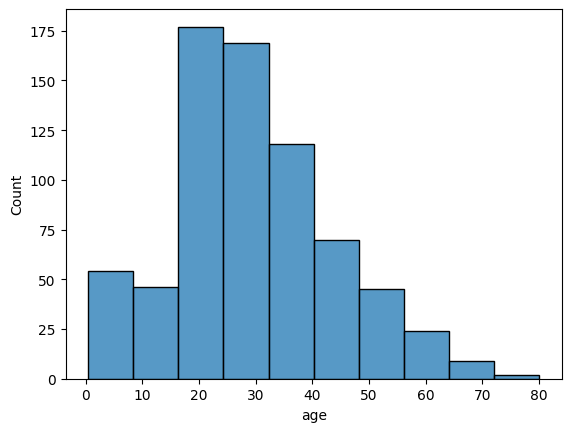

In [6]:
sns.histplot(data=titanic, x='age', bins=10)

히스토그램은 기본적으로 수치형 데이터 하나에 대한 빈도를 나타낸다. 

이 빈도를 특정 범주별로 구분해서 보고 싶을 때는 hue 파라미터에 해당 범주형 데이터를 전달하면 된다.

아래는 생존여부(alive 피처)에 따른 연령 분포를 그려주는 코드이다.

<Axes: xlabel='age', ylabel='Count'>

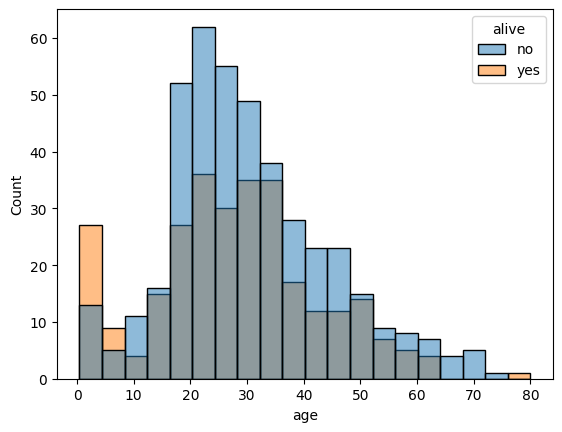

In [7]:
sns.histplot(data=titanic, x='age', hue='alive')

위는 생존자 수 그래프와 사망자 수 그래프를 포개지게 그린 그래프이다.

회색 구간이 두 그래프가 서로 겹친 부분이다. 만약 포개지지 않고 생존자 수와 사망자 수를 누적해 표현하려면 multiple = 'stack'을 전달하면 된다


<Axes: xlabel='age', ylabel='Count'>

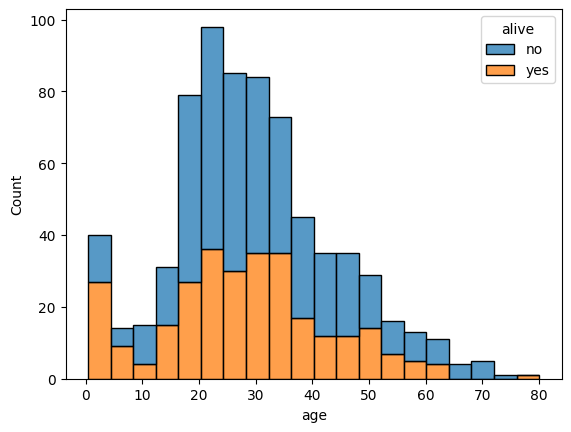

In [10]:
sns.histplot(data=titanic, x='age', hue='alive', multiple='stack')

#### 커널밀도추정 함수 그래프(kdeplot)

커널밀도추정 함수는 히스토그램을 곡선으로 연결한 그래프이다. 

데이터 분석 시 많이 사용되진 않는다.

``` python
sns.kdeplot(data=DataFrame 형식, x=분포를 파악하려는 feature)
```

<Axes: xlabel='age', ylabel='Density'>

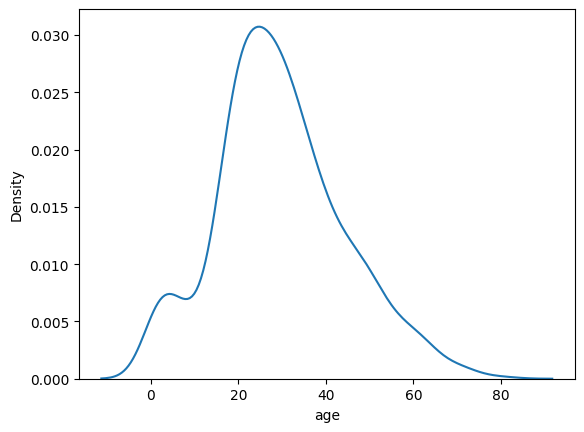

In [11]:
sns.kdeplot(data=titanic, x='age')

<Axes: xlabel='age', ylabel='Density'>

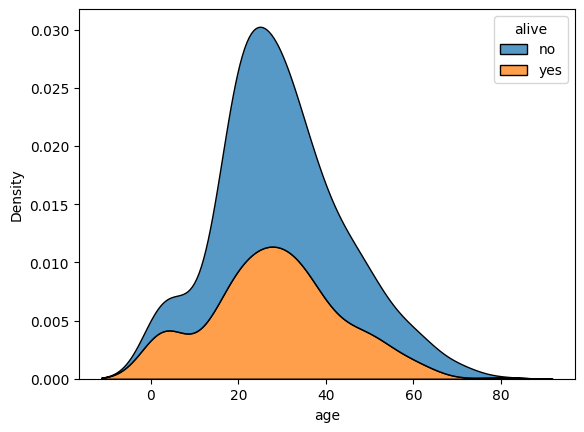

In [12]:
sns.kdeplot(data=titanic, x='age', hue='alive', multiple='stack')

#### 분포도(displot)

분포도는 수치형 데이터 하나의 분포를 나타내는 그래프이다. 

캐글에서 분포도를 그릴 땐 displot()을 많이 사용한다. 파라미터만 조정하면 histplot()과 kdeplot()이 제공하는 기본 그래프를 모두 그릴 수 있기 때문이다.

``` python
sns.displot(data=DataFrame 형식, x=분포를 파악하려는 feature)
```

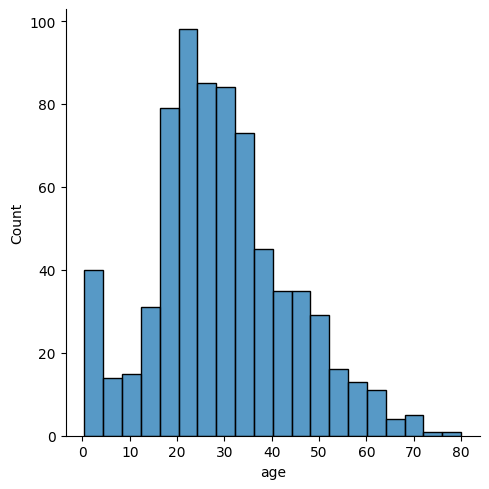

In [13]:
sns.displot(data=titanic, x='age')

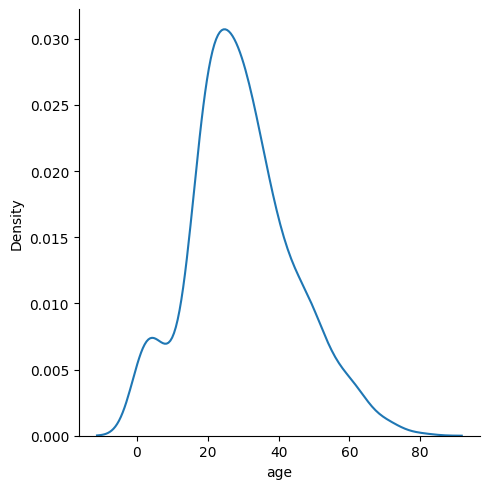

In [14]:
sns.displot(data=titanic, x='age', kind='kde')

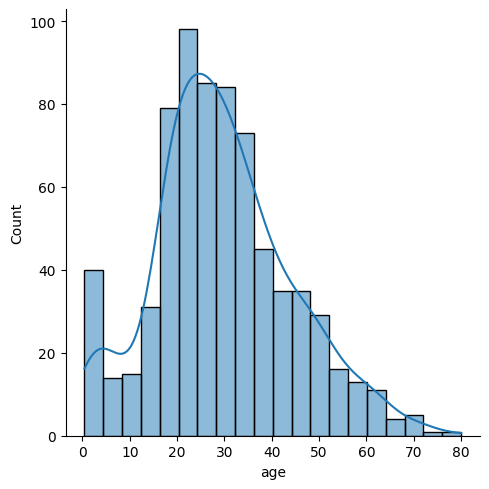

In [15]:
sns.displot(data=titanic, x='age', kde=True)

#### 러그플롯(rugplot)

러그플롯 은 주변 분포를 나타내는 그래프이다. 단독으로 사용하기보단 주로 다른 분포도 그래프와 함께 사용한다. 

``` python
sns.rugplot(data=DataFrame 형식, x=분포를 파악하려는 feature)
```

값이 밀집돼 있을수록 작은 선분들도 밀집되어 있다.

In [1]:
sns.kdeplot(data=titanic, x='age')
sns.rugplot(data=titanic, x='age')

NameError: name 'sns' is not defined

#

#

---

### 범주형 데이터 시각화

- barplot()    : 막대 그래프
- pointplot()  : 포인트플롯
- boxplot()    : 박스플롯
- violinplot() : 바이올린플롯
- countplot()  : 카운트플롯
- pie()        : 파이그래프

#

#### 막대 그래프(barplot)

막대 그래프는 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악할 때 사용한다. 

barplot()은 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 그려준다. 

수치형 데이터 평균은 막대높이로, 신뢰구간은 오차 막대로 표현한다. 

원본 데이터를 복원 샘플링 하여 얻은 표본을 활용해 평균과 신뢰구간을 구한다. 즉, barplot()은 원본 데이터 평균이 아니라 샘플링한 데이터 평균을 구해준다.

기본적으로 x 파라미터에 범주형 데이터를, y 파라미터에 수치형 데이터를 전달한다. 

``` python
sns.barplot(x='범주형 데이터', y='수치형 데이터', data=DataFrame 형식데이터)
```

<br/>

- 신뢰구간이란:
신뢰구간은 데이터의 불확실성을 나타냅니다. 쉽게 말해, "우리가 계산한 평균이 실제 평균과 얼마나 가까운지"를 보여주는 범위입니다.
예를 들어, 95% 신뢰구간이라고 하면, "우리가 많은 횟수로 같은 방식의 조사를 반복한다면, 95%의 경우에 실제 평균이 이 구간 안에 들어올 것"이라는 의미입니다.

<br/>

신뢰구간을 이해하기 위한 간단한 예시:

상황 설정:
당신이 어떤 도시의 평균 키를 알고 싶다고 가정해봅시다.
샘플링:
도시 전체 인구를 측정하는 것은 불가능하므로, 100명을 무작위로 선택해 키를 측정합니다.
결과:
이 100명의 평균 키가 170cm이고, 95% 신뢰구간이 168cm에서 172cm라고 나왔다고 합시다.
95% 신뢰구간의 의미:

이는 "만약 우리가 이 과정(100명을 선택해 측정하는 것)을 100번 반복한다면, 그 중 약 95번은 계산된 신뢰구간(168cm-172cm) 안에 실제 도시 전체의 평균 키가 포함될 것"이라는 뜻입니다.
다시 말해, 100번 중 95번 정도는 우리가 구한 구간이 실제 평균을 포함할 것이라는 의미입니다.


중요한 점:

이는 실제 평균이 반드시 이 구간 안에 있다는 뜻은 아닙니다.
대신, 우리의 추정이 얼마나 정확할 수 있는지에 대한 신뢰도를 나타냅니다.


실용적 해석:
"우리가 구한 이 구간(168cm-172cm)은 실제 도시 전체 평균 키를 포함할 가능성이 높습니다. 정확히 말하면, 이런 방식으로 구간을 계산할 때 95%의 확률로 실제 평균을 포함합니다."

이렇게 보면 신뢰구간은 우리가 추정한 결과가 얼마나 신뢰할 만한지를 나타내는 지표라고 할 수 있습니다. 95%라는 높은 수치는 우리의 추정이 꽤 정확할 가능성이 높다는 것을 의미합니다.

<br/>

- 복원 샘플링:
barplot() 함수는 원본 데이터에서 여러 번 샘플을 뽑아 (이를 '복원 샘플링'이라고 함) 평균과 신뢰구간을 계산합니다. 이는 더 안정적인 결과를 얻기 위함입니다.
예를 들어, 사과 판매량 데이터가 있다고 가정해봅시다:
[100, 120, 80, 110, 90]
이 데이터에서 여러 번 3개씩 무작위로 뽑아 (예: [100, 80, 110], [120, 90, 100], ...) 각각의 평균을 계산하고, 이 평균들의 분포를 이용해 전체적인 평균과 신뢰구간을 추정하는 방식입니다.

<br/>

- 원본 데이터와의 차이:
따라서 barplot()이 보여주는 결과는 원본 데이터의 단순 평균과 약간 다를 수 있습니다. 이 방법은 데이터의 불확실성을 더 잘 반영하고, 특히 데이터 수가 적을 때 더 안정적인 결과를 제공할 수 있습니다

<Axes: xlabel='class', ylabel='fare'>

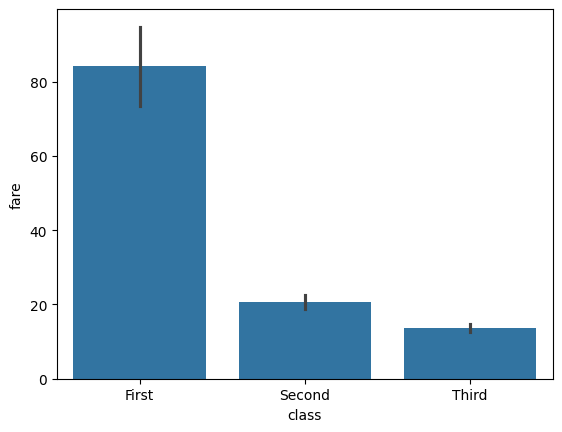

In [17]:
sns.barplot(data=titanic, x='class', y='fare')

막대 높이는 등급별 평균 운임을 뜻한다. 막대 상단의 검은색 세로줄이 오차 막대(신뢰구간) 이다. 

등급이 높을수록 평균 운임이 비싸고 신뢰구간이 넓어지는 것을 볼 수 있다.

#

#### 포인트 플롯(pointplot)

포인트플롯은 막대 그래프와 모양만 다를 뿐 동일한 정보를 제공한다.

``` python
sns.pointplot(x='범주형 데이터', y='수치형 데이터', data=DataFrame 형식데이터)
```

<Axes: xlabel='class', ylabel='fare'>

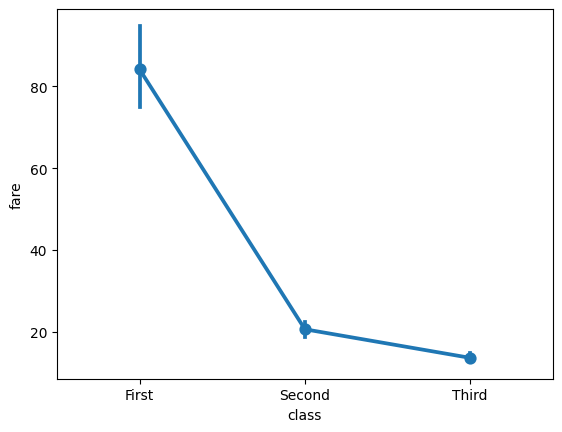

In [18]:
sns.pointplot(x='class', y='fare', data=titanic)

포인트 플롯은 한 화면에 여러 그래프를 그릴 때 사용하면 비교하기 쉽다.

#

#### 박스플롯(boxplot)

박스플롯은 막대 그래프나 포인트플롯보다 더 많은 정보를, 구체적으로 5가지 요약 수치를 제공한다. 

5가지 요약 수치는 최솟값, 제1사분위 수(Q1), 제 2사분위 수(Q2), 제3사분위수(Q3), 최대값을 뜻한다. 

- 제1사분위수() : 전체 데이터 중 하위 25%에 해당하는 값 
- 제2사분위수() : 50%에 해당하는 값(중앙값)
- 제3사분위수() : 상위25%에 해당하는 값
- 사분위 범위 수(IQR) : Q3 - Q1
- 최댓값 : Q3 + (1.5 * IQR)
- 최솟값 : Q1 - (1.5 * IQR)
- 이상치 : 최댓값보다 큰 값과 최솟값보다 작은 값

``` python
sns.pointplot(x='범주형 데이터', y='수치형 데이터', data=DataFrame 형식데이터)
```

<Axes: xlabel='class', ylabel='age'>

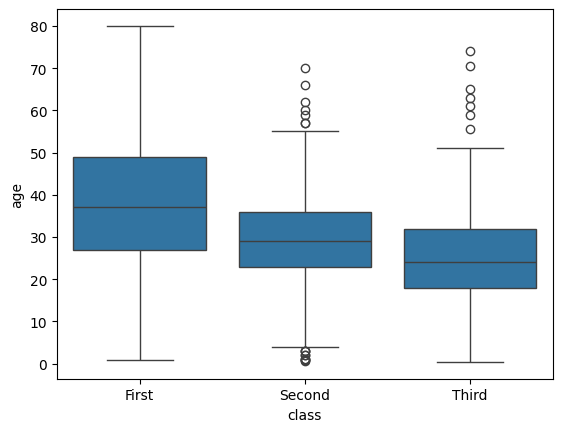

In [20]:
sns.boxplot(x='class', y='age', data=titanic)

#

#### 바이올린플롯(violinplot)

바이올린플롯은 박스플롯과 커널밀도추정 함수 그래프를 합쳐놓은 그래프라고 볼 수 있다. 

박스플롯이 제공하는 정보를 모두 포함하며, 모양은 커널밀도추정 함수 그래프 형태이다.



``` python
sns.violinplot(x='범주형 데이터', y='수치형 데이터', data=DataFrame 형식데이터)
```

<Axes: xlabel='class', ylabel='age'>

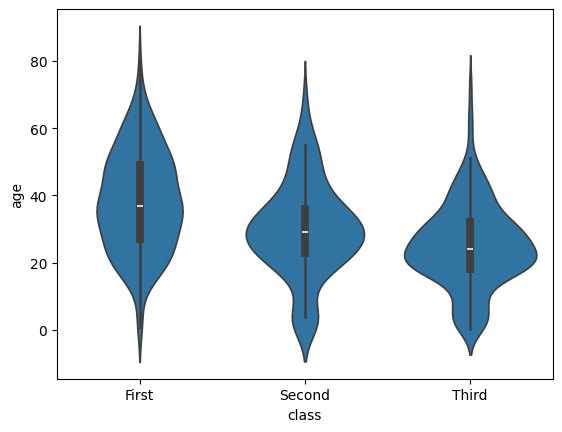

In [22]:
sns.violinplot(x='class', y='age', data=titanic)

5가지 요약 수치를 한눈에 보고싶다면 박스플롯, 수치형 데이터의 전체적인 분포 양상을 알고싶다면 바이올린 플롯

<Axes: xlabel='class', ylabel='age'>

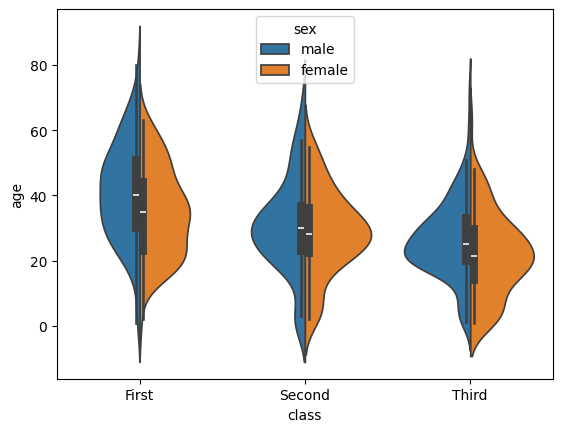

In [26]:
sns.violinplot(x='class', y='age', hue='sex', data=titanic, split=True)

#

#### 카운트플롯(countplot)

카운트플롯은 범주형 데이터의 갯수를 확인할 때 사용하는 그래프이다. 주로 범주형 피처나 범주형 타겟값의 분포가 어떤지 파악하는 용도로 사용한다.

``` python
sns.countplot(x='범주형 데이터', data=DataFrame 형식데이터)
```

<Axes: xlabel='class', ylabel='count'>

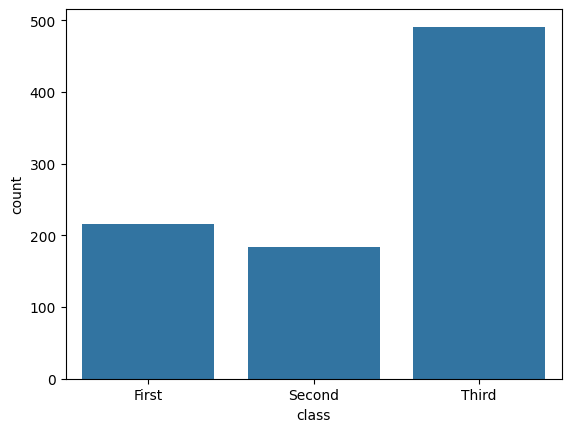

In [27]:
sns.countplot(x='class', data=titanic)

카운트플롯을 사용하면 범주형 데이터의 개수를 파악할 수 있다.

x파라미터를 y로 바꾸면 그래프 방향을 바꿀 수 있다.

<Axes: xlabel='count', ylabel='class'>

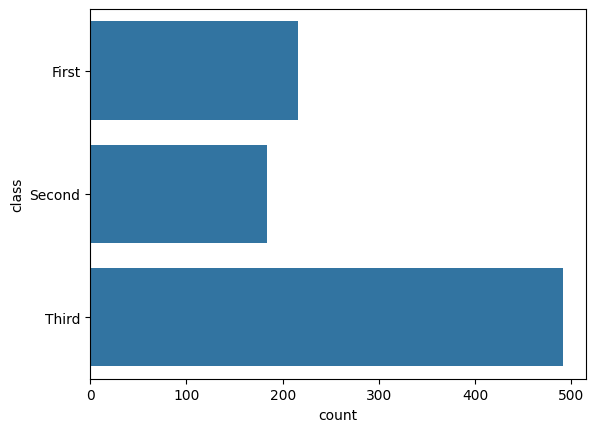

In [28]:
sns.countplot(y='class', data=titanic)

범주형 데이터 갯수가 많아 그래프가 옆으로 너무 넓어져 보기 불편할 때 사용

#

##### barplot() vs countplot()

막대 그래프를 그려주는 barplot()은 범주형 데이터별 수치형 데이터의 평균을 구해주기 때문에 feature를 2개 받는다.

반면

카운트플롯을 그려주는 countplot()은 feature 범주형 데이터 하나만 받는다.

<Axes: xlabel='class', ylabel='fare'>

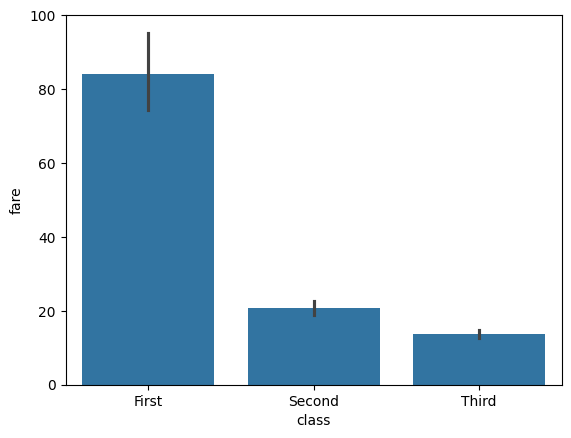

In [31]:
sns.barplot(x='class', y='fare', data=titanic)

<Axes: xlabel='class', ylabel='count'>

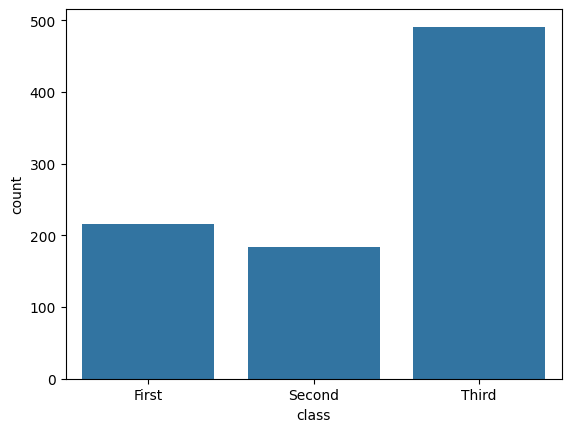

In [32]:
sns.countplot(x='class', data=titanic)

한편 barplot()으로는 평균이 아닌 중앙값, 최댓값, 최솟값을 구할 수도 있다.

``` python
sns.barplot(x='class', y='fare', data=titanic, estimator=np.median) # 중앙값
sns.barplot(x='class', y='fare', data=titanic, estimator=np.max) # 최댓값
sns.barplot(x='class', y='fare', data=titanic, estimator=np.min) # 최솟값
```

#

#### 파이 그래프(pie)

파이 그래프는 범주형 데이터별 비율을 알아볼 때 사용하기 좋은 그래프 이다. 

``` python
import matplotlib.pyplot as plt

plt.pie(x=비율, labels=범주형 데이터 레이블명, autopct='비율을 숫자로')
```

([<matplotlib.patches.Wedge at 0x14dcf8e20>,
 [Text(1.0461621663333946, 0.3399186987098808, 'A'),
  Text(-0.8899187482945419, 0.6465637025335369, 'B'),
  Text(0.6465639524941308, -0.8899185666875186, 'C')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(-0.4854102263424773, 0.3526711104728383, '60.0%'),
  Text(0.35267124681498035, -0.485410127284101, '30.0%')])

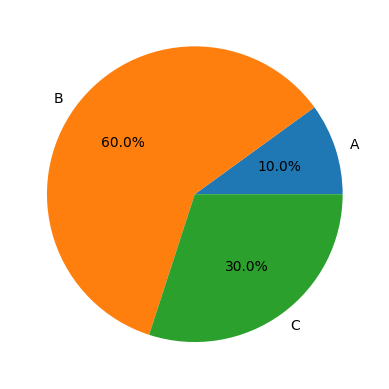

In [38]:
import matplotlib.pyplot as plt

x = [10, 60, 30]         # 범주형 데이터별 파이 그래프의 부채꼴 크기(비율)
labels = ['A', 'B', 'C'] # 범주형 데이터 레이블

plt.pie(x=x, labels=labels, autopct='%.1f%%')
# %.1f 는 소수점 자리수 
# %% 는 퍼센트 까지 표시한다는 의미 

#

#

---

### 데이터 관계 시각화

관계도는 여러 데이터 사이의 관계를 살펴보기 위한 그래프이다. 

#

#### 히트맵(heatmap)

히트맵은 데이터 간 관계를 색상으로 표현한 그래프이다. 비교해야 할 데이터가 많을 때 주로 사용한다.

In [39]:
flights = sns.load_dataset('flights')

In [40]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


범주형 데이터 2개(year, month)

수치형 데이터 1개(passengers)

In [43]:
"""
판다스의 pivot() 함수를 사용해 index와 columns 파라미터에 전달한 feature를 각각 행과 열로 지정하고, values 파라미터에 전달한 feature를 함한 표를 반환한다.

아래는 각 연도의 월별 승객수를 알기 위해 month를 행으로, year를 열로, 합산할 데이터를 passengers로 지정한다.
"""

flights_pivot = flights.pivot(index = 'month',
                              columns='year',
                              values='passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

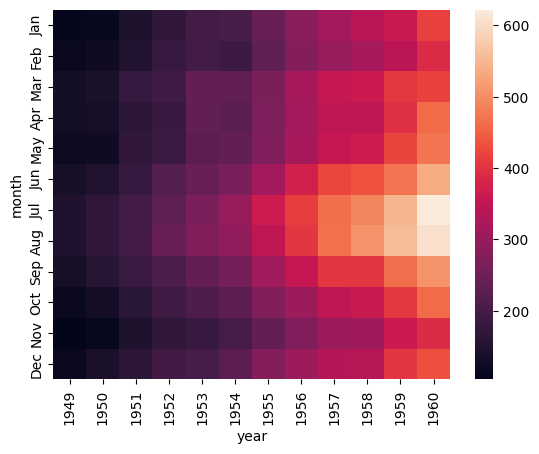

In [42]:
sns.heatmap(data=flights_pivot)

#

#### 라인플롯(lineplot)

라인플롯은 두 수치형 데이터 사이의 관계를 나타낼 때 사용한다. 

기본적으로는 x 파라미터에 전달한 값에 따라 y 파라미터에 전달한 값의 평균과 95% 신뢰구간을 나타낸다.

<Axes: xlabel='year', ylabel='passengers'>

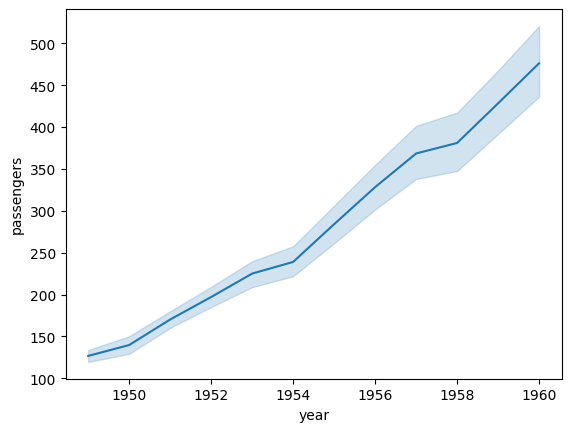

In [44]:
sns.lineplot(x='year', y='passengers', data=flights)

x 축은 연도, y축은 평균 승객수를 나타낸다. 해가 갈수록 평균 승객이 늘어남을 알 수 있다.

실선 주면의 음영은 95% 신뢰구간을 의미한다.

#

#### 산점도(scatterplot)

산점도는 두 데이터의 관계를 점으로 표현하는 그래프이다.

In [45]:
tips = sns.load_dataset('tips')

In [46]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

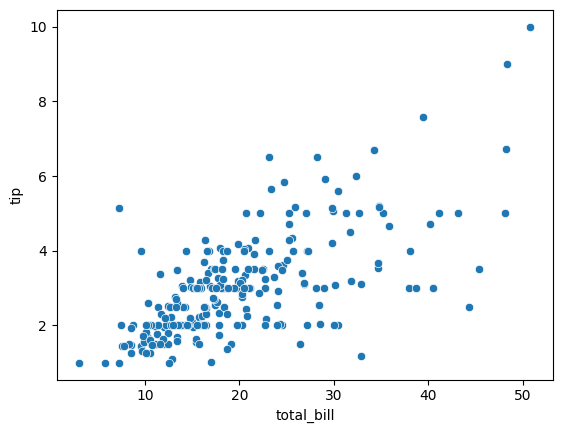

In [47]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

대체로 총액이 늘면 팁도 따라서 늘고 있는것을 볼 수 있다.

hue 파라미터를 이용해 산점도를 특정 범주형 데이터 별로 나눠 그릴 수 있다.

시간에 따라 나누게 된다면

<Axes: xlabel='total_bill', ylabel='tip'>

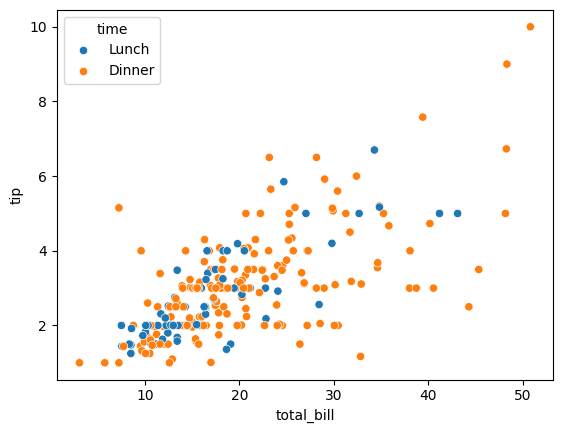

In [48]:
sns.scatterplot(x='total_bill', y='tip', hue='time', data=tips)

#

#### 회귀선을 포함한 산점도 그래프(regplot)

regplot()은 산점도와 선형 회귀선을 동시에 그려주는 함수이다. 회귀선을 그리면 전반적인 상관관계 파악이 좀 더 쉽다. 

<Axes: xlabel='total_bill', ylabel='tip'>

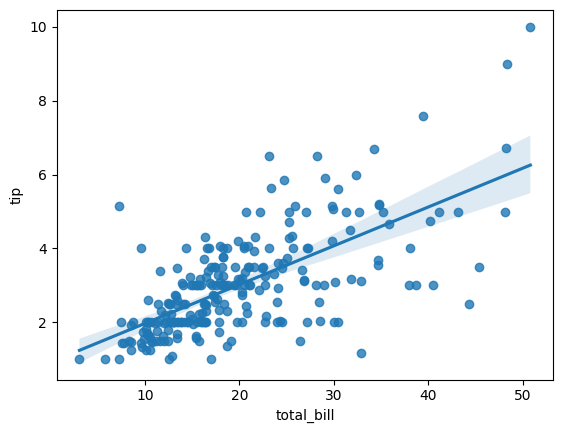

In [49]:
sns.regplot(x='total_bill', y='tip', data=tips)

선형 회귀선 주변 음영은 95% 신뢰구간을 의미한다. 신뢰구간을 99%로 늘리려면 ci 파라미터에 99를 전달하면 된다.

<Axes: xlabel='total_bill', ylabel='tip'>

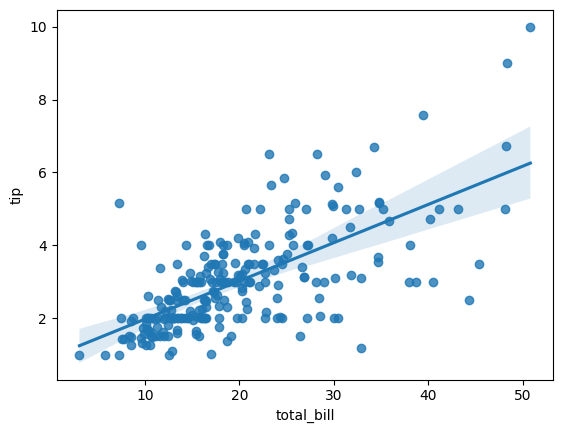

In [50]:
sns.regplot(x='total_bill', y='tip', ci=99, data=tips)

99% 신뢰구간으로 설정하니 음영 부분이 더 넓어진 걸 확인할 수 있다.